In [1]:
from src.utils import *
from src.preprocessing import *
import matplotlib.pyplot as plt
import pickle as pkl
from sklearn.metrics import f1_score

2022-05-30 09:32:25.879312: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-30 09:32:25.879338: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
X,y,X_comp = load_data()
X_df,y_df,X_comp_df = load_data(df_format=True)
X_miss = fill_na_pmm()
y_enc = encoding_labels(y)

In [18]:
model = pkl.load(open('models/model101.pkl', 'rb'))

In [32]:
imp = model['dt'].feature_importances_
imp

array([0.01259712, 0.00862903, 0.02686622, 0.01130274, 0.0384416 ,
       0.02283301, 0.01346464, 0.03122788, 0.01191741, 0.01241808,
       0.06212226, 0.01303969, 0.07442389, 0.        , 0.00445893,
       0.01588391, 0.04729409, 0.00901848, 0.00643055, 0.00264308,
       0.0119015 , 0.01207206, 0.00994876, 0.00529413, 0.02571352,
       0.03181101, 0.01048779, 0.01901516, 0.06013134, 0.00733342,
       0.01991704, 0.02197519, 0.31289731, 0.00110752, 0.01109573,
       0.01428592])

<BarContainer object of 36 artists>

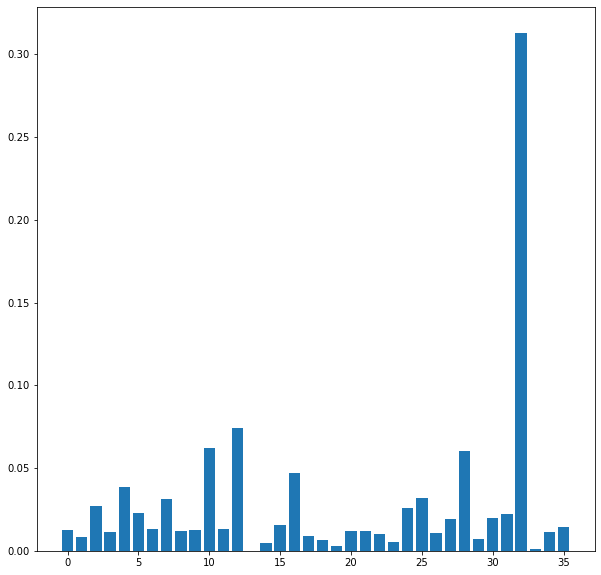

In [39]:
plt.figure(figsize=(10, 10))
plt.bar(np.arange(0,36,1), imp)

In [48]:
new_cols = [feat for i,feat in enumerate(X_df.columns) if imp[i]>imp[35]]
new_cols

['feat_2',
 'feat_4',
 'feat_5',
 'feat_7',
 'feat_10',
 'feat_12',
 'feat_15',
 'feat_16',
 'feat_24',
 'feat_25',
 'feat_27',
 'feat_28',
 'feat_30',
 'feat_31',
 'feat_32']

In [52]:
model_rf = pkl.load(open('models/model102.pkl', 'rb'))
imp = model['rf'].feature_importances_
imp

array([0.00955362, 0.00916324, 0.08001714, 0.00826932, 0.02220838,
       0.05087575, 0.01592054, 0.0555377 , 0.01102172, 0.00971723,
       0.05504953, 0.0155035 , 0.07572565, 0.00876967, 0.00984189,
       0.00953249, 0.04321224, 0.02766047, 0.01237018, 0.00910738,
       0.01770155, 0.00860123, 0.01742837, 0.01031235, 0.03193677,
       0.02230533, 0.01008248, 0.04702282, 0.07037778, 0.0091983 ,
       0.03100214, 0.07256876, 0.07892925, 0.00857624, 0.0163519 ,
       0.00854709])

<BarContainer object of 36 artists>

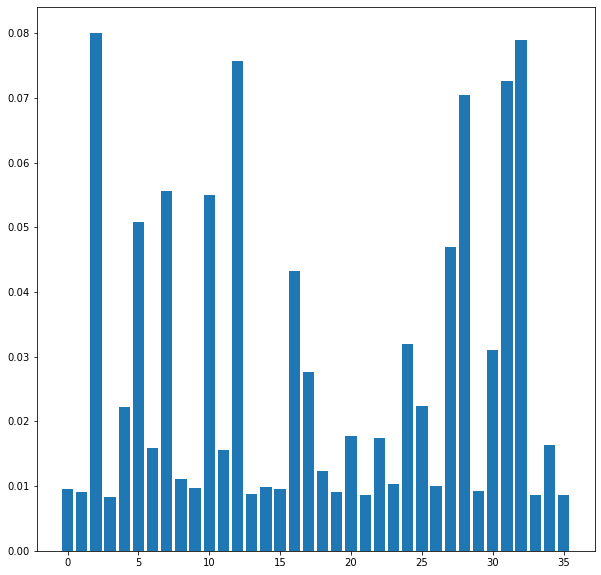

In [53]:
plt.figure(figsize=(10, 10))
plt.bar(np.arange(0,36,1), imp)

In [57]:
new_cols_rf = [feat for i,feat in enumerate(X_df.columns) if imp[i]>imp[35] + 0.005]
new_cols_rf

['feat_2',
 'feat_4',
 'feat_5',
 'feat_6',
 'feat_7',
 'feat_10',
 'feat_11',
 'feat_12',
 'feat_16',
 'feat_17',
 'feat_20',
 'feat_22',
 'feat_24',
 'feat_25',
 'feat_27',
 'feat_28',
 'feat_30',
 'feat_31',
 'feat_32',
 'feat_34']

In [58]:
len(new_cols_rf)

20

In [5]:
model = pkl.load(open('models/model103.pkl', 'rb'))
imp = model['et'].feature_importances_
imp

array([0.011817  , 0.01135632, 0.05158384, 0.01018817, 0.02875911,
       0.05003765, 0.02157826, 0.05363739, 0.01312202, 0.01148949,
       0.05446715, 0.0171865 , 0.05996229, 0.010642  , 0.01157543,
       0.01112695, 0.03849024, 0.0379083 , 0.01797098, 0.01169977,
       0.0180189 , 0.01096008, 0.01889903, 0.01458051, 0.03220119,
       0.0222505 , 0.01267454, 0.04305372, 0.07019249, 0.0112771 ,
       0.03545925, 0.06441374, 0.07145411, 0.01112674, 0.01758223,
       0.01125698])

<BarContainer object of 36 artists>

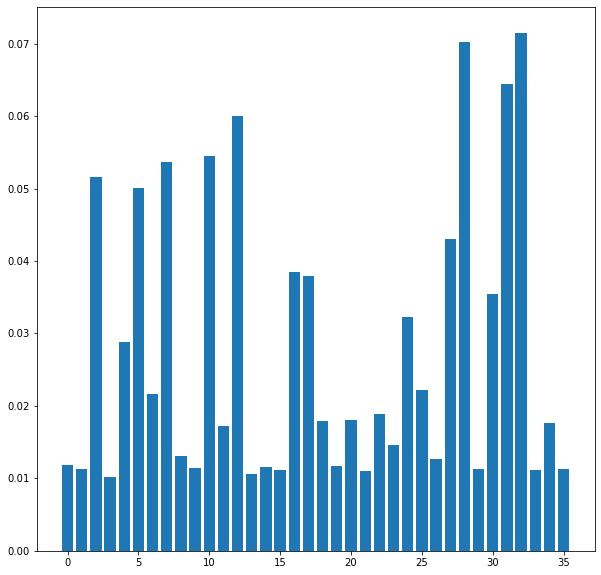

In [6]:
plt.figure(figsize=(10, 10))
plt.bar(np.arange(0,36,1), imp)

In [11]:
new_cols = [feat for i,feat in enumerate(X_df.columns) if imp[i]>imp[35] + 0.005]
new_cols

['feat_2',
 'feat_4',
 'feat_5',
 'feat_6',
 'feat_7',
 'feat_10',
 'feat_11',
 'feat_12',
 'feat_16',
 'feat_17',
 'feat_18',
 'feat_20',
 'feat_22',
 'feat_24',
 'feat_25',
 'feat_27',
 'feat_28',
 'feat_30',
 'feat_31',
 'feat_32',
 'feat_34']

In [27]:
probs = model.predict_proba(x)
preds = model.predict(x)

In [14]:
from sklearn.metrics import precision_recall_curve

def evaluate_prec_recall(probs, y_true):
    precision, recall, thresholds = precision_recall_curve(y_true, probs[:, 1])

    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)

    # title
    plt.title(f'Precision-Recall\nBest F1 score = {fscore[ix]:.2f}')
    # plot the precision-recall curves
    no_skill = len(y_true[y_true==1]) / len(y_true)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No skill')
    plt.plot(recall, precision, marker='.', label='Bert Classifier')
    plt.plot(recall[ix], precision[ix], marker='o', color='black', label=f'Best threshold = {thresholds[ix]:.2f}')
    # show legend
    plt.legend()
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the plot 
    plt.show()

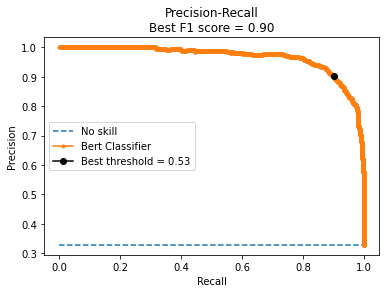

In [28]:
evaluate_prec_recall(probs, y)

In [32]:
threshold = 0.53
preds = np.where(probs[:,1] > threshold, True, False)

In [33]:
f1_score(y, preds)

0.9002341920374708